# Assignment 1: K-NN & Linear Regression
## Made By:
## Amr Attia Abdelraouf 8907
## Ahmad Zaki Ahmad Zaki Mahrous 8910
## Mohamed Ahmed Hamdy Shal 8909

# Imports

- **numpy**: used for efficient numerical and matrix operations for large, multidimensional arrays

In [35]:
import numpy as np

- **pandas**: used to handle data using DataFrames (tables)

In [36]:
import pandas as pd

- **random**: used to generate random numbers

In [37]:
import random

- **matplotlib.pyplot**: used to visualise data and results

In [38]:
import matplotlib.pyplot as plt

- **KNeighborsClassifier**: the K-Nearest Neighbors classifier implemented in scikitlearn

In [39]:
from sklearn.neighbors import KNeighborsClassifier

- **accuracy_score**: measures how often the classifier correctly predicts labels
- **classification_report**: provides precision, recall, and F1-score for classification models
- **confusion_matrix**: displays a table showing true vs predicted values for each class
- **mean_squared_error**: measures average squared difference between predicted and actual values
- **mean_absolute_error**: measures average absolute difference between predicted and actual values
- **r2_score**: represents how well the regression predictions fit the true data (coefficient of determination)
- **precision_score**: measures how many of the samples predicted as positive were actually positive
- **recall_score**: measures how many of the actual positive samples were correctly identified
- **f1_score**: combines precision and recall into a single metric

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score, f1_score

- **train_test_split**: used to split dataset

In [41]:
from sklearn.model_selection import train_test_split

- **LinearRegression**: the standard linear regression model

- **Ridge**: linear regression with L2 regularization, helps prevent overfitting by penalizing large coefficients

- **Lasso**: linear regression with L1 regularization, can reduce some coefficients to zero (feature selection)

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

- **StandardScaler**: a preprocessing tool that standardizes features by removing the mean and scaling to unit variance

In [43]:
from sklearn.preprocessing import StandardScaler

- **Seaborn**: used to visualize the confusion matrix as a clear and colour-coded heatmap

In [44]:
import seaborn as sns

# Telescope dataset


### Reading data and splitting dataset

Open the CSV file and drop the first column, as it is not a feature.

In [45]:
data=pd.read_csv('telescope_data.csv')
data=data.drop('Unnamed: 0', axis=1)

Assign all the gamma records to the **gamma_data** variable, and all hadron records to the **hadron_data** variable. This is done using numpy's thresholding/masking, where only the records that match the condition are returned.

In [46]:
gamma_data = data[data['class'] == 'g']
hadron_data = data[data['class'] == 'h']

Since the hadron records are less in number, the data will be biased towards the gamma particles. This is why we resample the gamma records to make the data symmetric and remove the bias.

In [47]:
target_size = len(hadron_data)

gamma_data_balanced = gamma_data.sample(n=target_size, random_state=42)
hadron_data_balanced = hadron_data.sample(n=target_size, random_state=42)

Concatenate both gamma and hadron records and randomly shuffle them. The **.reset_index(drop=True)** is used to reset the index back to normal after shuffling.

In [48]:
data = pd.concat([gamma_data_balanced, hadron_data_balanced])

data = data.sample(frac=1, random_state=43).reset_index(drop=True)

Split the table of data into the features (**X**) and output (**y**), then split those to the training, validation and testing datasets.

The **stratify** parameter's job is to make sure that the ratio of the classes is nearly equal in both splits. This prevents data imbalance.

In [49]:
X = data.drop('class', axis=1)
y = data['class']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=43, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=43, stratify=y_temp
)


### Manual Implementation


Our manual implementation consists of 2 main parts:
1. Getting the K-nearest neighbours using the *get_K_neighbours* function:
- We first calculate the square difference between each feature of the training samples and the corresponding feature of the test point using *train_X - point*
- *np.sum()* sums the squared differences across all features for each sample returning a 1 dimensional array where each element represents the distance between each training sample and our point
- *np.argsort()* sorts the **indices** of the distances and then we slice only the K number of neighbours we need
- We then return the classes of these indices for our second step


In [50]:
def get_K_neighbours(train_X, train_Y, point, k):
    distances = np.sum((train_X - point) ** 2, axis=1)
    #k_indices = np.argpartition(distances, k)[:k]  # faster than full sort
    k_indices = np.argsort(distances)[:k]
    return train_Y[k_indices]

2. Getting the final class by taking a majority vote using the *predict* function
- Using the *np.unique()* function, it returns an array of all the unique classes and when setting *return_counts* to True, it returns how many times each label occured
- Then using the *np.argmax()* we can find the index of the highest occuring class which also matches the index of the class itself in the values array

In [51]:
def predict(train_X, train_Y, point, k):
    neighbors = get_K_neighbours(train_X, train_Y, point, k)
    # Count occurrences directly
    values, counts = np.unique(neighbors, return_counts=True)
    return values[np.argmax(counts)]

- To run our manual model, we first convert the data from DataFrames to NumPy arrays to enable faster and more efficient numerical computations. <br>
- Next, we evaluate the model on the validation set using different values of K (from 1 to 49) to determine the optimal K. <br>
- Finally, we use this best K value to test the model on the test dataset.

In [52]:
# Convert to NumPy arrays for speed
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()
X_val_np = X_val.to_numpy()
y_val_np = y_val.to_numpy()

manual_accuracies = []
m_best_accuracy = 0
m_best_k = 0

for k in range(1, 50, 2):
    preds = np.array([predict(X_train_np, y_train_np, point, k) for point in X_val_np])
    acc_manual = np.sum(preds == y_val_np) / len(y_val_np)
    manual_accuracies.append(acc_manual)
    if acc_manual > m_best_accuracy:
        m_best_accuracy = acc_manual
        m_best_k = k

preds_manual = np.array([predict(X_train_np, y_train_np, point, m_best_k) for point in X_test_np])
acc_manual = np.sum(preds_manual == y_test_np) / len(y_test_np)
print(acc_manual)
print(m_best_k)

0.759840558046836
25


### Scikit-Learn Implementation

This part aims to find the best k by running the model on the validation dataset by doing the following steps:
1. Making a new instance of the **KNeighborsClassifier** with the parameter **k** equal to variable **i**
2. Training the model and fitting it on the dataset
3. Predicting the outputs of the validation dataset
4. Getting the accuracy of the model with the current **k**
5. If it is better, the new best **k** is recorded

In [53]:
sklearn_accuracies=[]
s_best_accuracy=0
s_best_k=0
for i in range(1,50,2):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_np, y_train_np)
  preds_sklearn = knn.predict(X_val_np)
  acc_sklearn = accuracy_score(y_val_np, preds_sklearn)
  sklearn_accuracies.append(acc_sklearn)
  if acc_sklearn>s_best_accuracy:
    s_best_accuracy=acc_sklearn
    best_k=i

Print the best **k** and its accuracy.

In [54]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_np, y_train_np)
preds_sklearn = knn.predict(X_test_np)
acc_sklearn = accuracy_score(y_test_np, preds_sklearn)
print(acc_sklearn)
print(best_k)



0.759840558046836
25


###  Plots

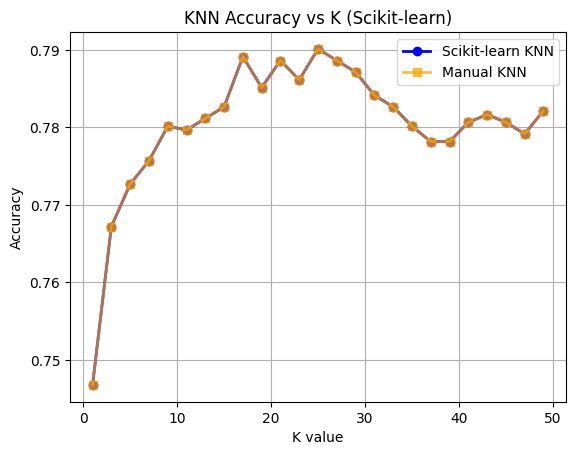

In [55]:
k_values = list(range(1, 50, 2))
plt.plot(k_values, sklearn_accuracies, color='blue', alpha=1, linewidth=2, marker='o', label='Scikit-learn KNN')
plt.plot(k_values, manual_accuracies, color='orange', alpha=0.7, linewidth=2, marker='s', label='Manual KNN')

plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K (Scikit-learn)')
plt.legend()
plt.grid(True)
plt.show()



### Observations:
. Our manual and Scikit-learn models achieved the same optimal K when evaluated on the validation data which was 25 <br>
. After applying the optimum K to the test data, the manual implementation achieved 79% while the scikit-learn achieved 76% <br>
. When K is small (1 to 5) the models are very flexible which might lead to overfitting <br>
. When K is high (27 to 35) he model becomes too smooth because it averages over many neighbours, leading to high bias and underfitting


The **evaluate_model()** function takes in the true labels and the predicted labels and performs all the scores on them(accuracy, precision, recall, f1) using Scikit-learn functions that were imported above and also calculates the confusion matrix which is then displayed using SNS in a cleaner graph <br>
We then run this function on both our manual and Sckit-learn results


 Manual KNN Evaluation Metrics:
Accuracy:  0.760
Precision: 0.717
Recall:    0.860
F1 Score:  0.782

Detailed Report:
               precision    recall  f1-score   support

           g       0.72      0.86      0.78      1004
           h       0.82      0.66      0.73      1003

    accuracy                           0.76      2007
   macro avg       0.77      0.76      0.76      2007
weighted avg       0.77      0.76      0.76      2007



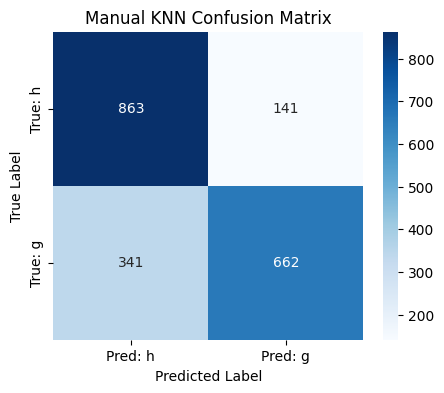


 Scikit-learn KNN Evaluation Metrics:
Accuracy:  0.760
Precision: 0.717
Recall:    0.860
F1 Score:  0.782

Detailed Report:
               precision    recall  f1-score   support

           g       0.72      0.86      0.78      1004
           h       0.82      0.66      0.73      1003

    accuracy                           0.76      2007
   macro avg       0.77      0.76      0.76      2007
weighted avg       0.77      0.76      0.76      2007



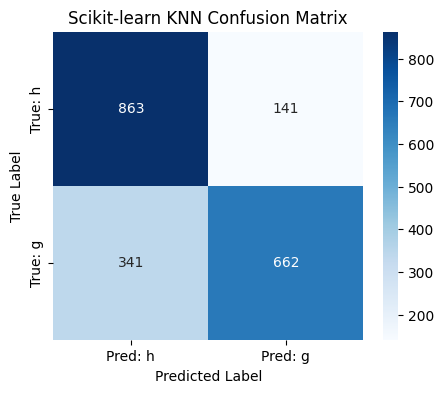

In [56]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='binary', pos_label='g')
    rec = recall_score(y_true, y_pred, average='binary', pos_label='g')
    f1 = f1_score(y_true, y_pred, average='binary', pos_label='g')
    cm = confusion_matrix(y_true, y_pred)


    print(f"\n {model_name} Evaluation Metrics:")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1 Score:  {f1:.3f}")
    print("\nDetailed Report:\n", classification_report(y_true, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred: h', 'Pred: g'],
                yticklabels=['True: h', 'True: g'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

evaluate_model(y_test, preds_manual, "Manual KNN")
evaluate_model(y_test, preds_sklearn, "Scikit-learn KNN")

# House dataset

### Reading data and splitting dataset

Open the CSV file. Split the table of data into the features (**X**) and output (**y**).

In [57]:
df = pd.read_csv("California_Houses.csv")
X = df.drop(columns=["Median_House_Value"])
y = df["Median_House_Value"]

Split dataset into training, validation and test datasets.

In [58]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=43
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=43
)

Standardize features by removing the mean and scaling to unit variance.

The function **fit_transform** first calculates the mean and standard deviation and saves them, then transforms the values.

The function **transform** uses the pre-saved mean and standard deviation to directly transform the values.

In [59]:
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### scikit-learn Implementation

#### Model Training and Evaluation

The following code trains and evaluates three regression models using scaled training and validation sets:

1. **Linear Regression**: Baseline model without regularization.
2. **Ridge Regression**: Uses L2 regularization to reduce overfitting by shrinking coefficients.
3. **Lasso Regression**: Uses L1 regularization, which can shrink some coefficients to zero (feature selection).

For each model, predictions are made on the validation set, and performance is evaluated using:

- **MSE (Mean Squared Error)**: Penalizes larger errors more heavily, punishing outliers heavily.
- **MAE (Mean Absolute Error)**: Measures average magnitude of prediction errors.


In [60]:
lin_reg_normal = LinearRegression()
lin_reg_normal.fit(X_train_scaled, y_train)
y_pred_lin_normal = lin_reg_normal.predict(X_val_scaled)
mse_lin_normal = mean_squared_error(y_val, y_pred_lin_normal)
mae_lin_normal = mean_absolute_error(y_val, y_pred_lin_normal)

ridge_normal = Ridge(alpha=1.0)
ridge_normal.fit(X_train_scaled, y_train)
y_pred_ridge_normal = ridge_normal.predict(X_val_scaled)
mse_ridge_normal = mean_squared_error(y_val, y_pred_ridge_normal)
mae_ridge_normal = mean_absolute_error(y_val, y_pred_ridge_normal)

lasso_reg = Lasso(alpha=0.1, max_iter=1000)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_val_scaled)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.271e+13, tolerance: 1.924e+10
  model = cd_fast.enet_coordinate_descent(


#### MSE and MAE Comparison Bar Chart  
Plots the Mean Absolute Error (MAE) and the Mean Square Error (MSE) for different models on the validation set.

##### Steps
1. **Define Labels & Values**.
2. **Create Bar Chart**: Each bar represents the validation MAE / MSE of a model.  
3. **Format Plot**: Add labels, title, and adjust colors for clear visualization.


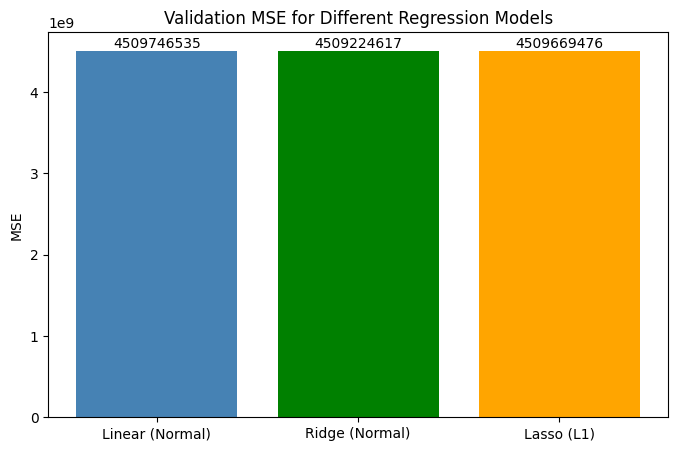

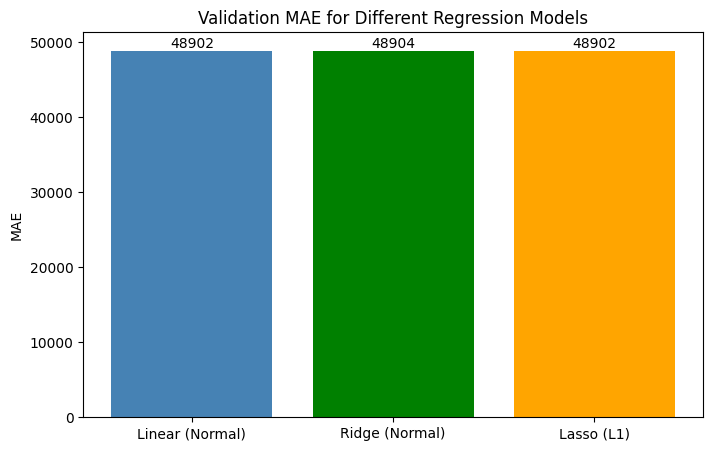

In [61]:
models = [
    "Linear (Normal)",
    "Ridge (Normal)",
    "Lasso (L1)"
]
mse_values = [
    mse_lin_normal,
    mse_ridge_normal,
    mse_lasso
]
mae_values = [
    mae_lin_normal,
    mae_ridge_normal,
    mae_lasso
]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, mse_values, color=["steelblue", "green", "orange"])
plt.ylabel("MSE")
plt.title("Validation MSE for Different Regression Models")
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom')
plt.show()

plt.figure(figsize=(8, 5))
bars = plt.bar(models, mae_values, color=["steelblue", "green", "orange"])
plt.ylabel("MAE")
plt.title("Validation MAE for Different Regression Models")
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom')
plt.show()


#### Hyperparameter Tuning for `alpha` (Ridge & Lasso)  
This block searches for the optimal regularization strength by evaluating multiple values and selecting the one that minimizes validation MSE.

##### Steps
1. **Generate alpha values**: We generate values for alpha using logspace as alpha spans several orders of magnitude, to reach optimal value.
2. **Train Models**: For each alpha, train Ridge (Normal Equation) and Lasso (GD).  
3. **Evaluate MSE**: Compute validation MSE for each alpha and store the results.  
4. **Select Best Alpha**: Find the alpha that gives the lowest MSE for Ridge and Lasso.  
5. **Print Results**: Output the best alpha values and corresponding MSE scores.


In [62]:
alpha_values = np.logspace(-4, 2, 30)
ridge_mse = []
lasso_mse = []

for alpha in alpha_values:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train_scaled, y_train)
  y_pred_ridge = ridge.predict(X_val_scaled)
  ridge_mse.append(mean_squared_error(y_val, y_pred_ridge))

  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(X_train_scaled, y_train)
  y_pred_lasso = lasso.predict(X_val_scaled)
  lasso_mse.append(mean_squared_error(y_val, y_pred_lasso))

sk_best_alpha_ridge = alpha_values[np.argmin(ridge_mse)]
sk_best_alpha_lasso = alpha_values[np.argmin(lasso_mse)]

print(f"Best alpha for Ridge (L2): {sk_best_alpha_ridge} with MSE: {min(ridge_mse)}")
print(f"Best alpha for Lasso (L1): {sk_best_alpha_lasso} with MSE: {min(lasso_mse)}")


Best alpha for Ridge (L2): 14.873521072935118 with MSE: 4506829732.738409
Best alpha for Lasso (L1): 38.56620421163472 with MSE: 4507987291.757257


#### Plotting `MSE` with `alpha` (Ridge & Lasso)  
This block plots how MSE changes as you change alpha to reach the optimal alpha where MSE reaches its minimum.

##### Steps
1. **Plot MSE Curves**: Use `plt.semilogx` to plot MSE vs alpha on a logarithmic x-axis for better visibility across orders of magnitude.  
2. Marks Optimal alpha by drawing vertical lines at the alpha values that minimize validation MSE for Ridge and Lasso.  
3. **Add Labels & Grid**.
4. **Show Plot**.

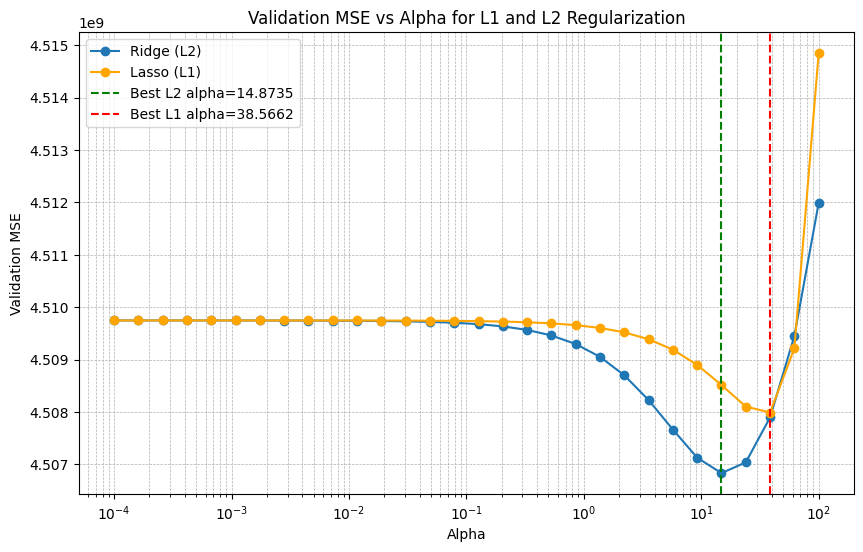

In [63]:
plt.figure(figsize=(10,6))
plt.semilogx(alpha_values, ridge_mse, label='Ridge (L2)', marker='o')
plt.semilogx(alpha_values, lasso_mse, label='Lasso (L1)', marker='o', color='orange')

plt.axvline(sk_best_alpha_ridge, linestyle='--', color='green', label=f'Best L2 alpha={sk_best_alpha_ridge:.4f}')
plt.axvline(sk_best_alpha_lasso, linestyle='--', color='red', label=f'Best L1 alpha={sk_best_alpha_lasso:.4f}')

plt.xlabel('Alpha')
plt.ylabel('Validation MSE')
plt.title('Validation MSE vs Alpha for L1 and L2 Regularization')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

#### R2 Score Comparison Bar Chart
Compares between the different models using R2 score which shows the percentage of the variance that can be explained by the model.

##### Steps
1. Computes R2 for Linear, Ridge, and Lasso using the validation set.  
2. Stores model labels and corresponding R2 values.  
3. Display a bar chart with R2 scores for each model.  
4. Add numeric R2 values above each bar for clarity.  
5. Format Plot

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.873e+11, tolerance: 1.924e+10
  model = cd_fast.enet_coordinate_descent(


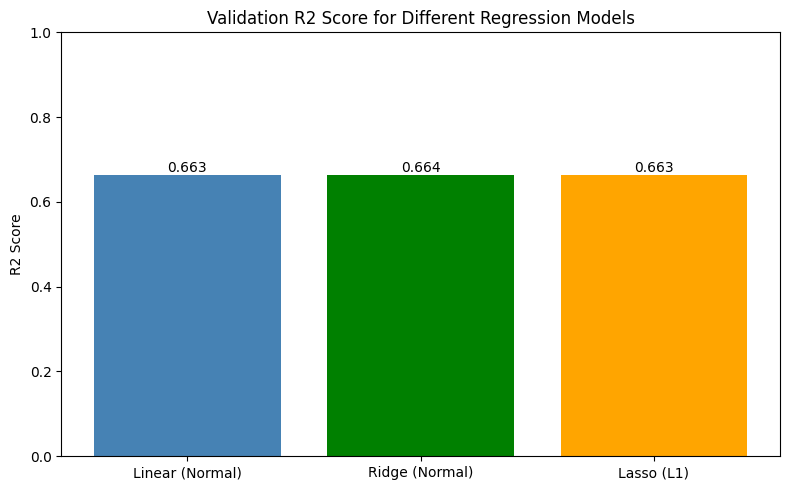

In [64]:
r2_lin_normal = r2_score(y_val, y_pred_lin_normal)

ridge_normal = Ridge(alpha=sk_best_alpha_ridge)
ridge_normal.fit(X_train_scaled, y_train)
y_pred_ridge_normal = ridge_normal.predict(X_val_scaled)
r2_ridge_normal = r2_score(y_val, y_pred_ridge_normal)

lasso_reg = Lasso(alpha=sk_best_alpha_lasso, max_iter=1000)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_val_scaled)
r2_lasso = r2_score(y_val, y_pred_lasso)

models = [
    "Linear (Normal)",
    "Ridge (Normal)",
    "Lasso (L1)"
]
r2_values = [
    r2_lin_normal,
    r2_ridge_normal,
    r2_lasso
]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_values, color=["steelblue", "green", "orange"])
plt.ylabel("R2 Score")
plt.title("Validation R2 Score for Different Regression Models")
plt.ylim(0, 1)

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Manual Implementation

#### Add Bias Term to Feature Matrix
This helper function inserts a column of ones at the beginning of the feature matrix `X`.

This allows linear models to learn the intercept in the regression equation without adding a separate `b` term.


In [65]:
def add_bias(X):
  return np.insert(X, 0, 1, axis=1)

#### Evaluation Metrics: MSE, MAE, and R2 Score

This block defines three common regression evaluation metrics:

* **MSE (Mean Squared Error)**: Measures average squared difference between predicted and actual values.
* **MAE (Mean Absolute Error)**: Measures average absolute difference between predicted and actual values.
* **R² Score (Coefficient of Determination)**: Indicates how well the model explains variance in the target.


In [66]:
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
  return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
  ss_res = np.sum((y_true - y_pred) ** 2)
  ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
  return 1 - (ss_res / ss_tot)


#### `M_LinearRegression` Manual Linear Regression Class

A simple implementation of Linear Regression supporting both:
- Gradient Descent optimization
- Normal Equation

##### Functions
- `fit(X, y)`: Train the model on data using GD or Normal Equation.  
- `predict(X)`: Predict target values for new data.  
- `mse(X, y)`, `mae(X, y)`, `r2_score(X, y)`: Evaluate model performance.  

##### Parameters
- `learning_rate` *(float)*: Step size for gradient descent.  
- `n_iterations` *(int)*: Number of iterations for gradient descent.  
- `use_gradient_descent` *(bool)*: If `False`, uses Normal Equation instead of GD.


In [67]:
class M_LinearRegression:
  def __init__(self, learning_rate=0.01, n_iterations=1000, use_gradient_descent=True):
    self.lr = learning_rate
    self.n_iter = n_iterations
    self.use_gd = use_gradient_descent

  def fit(self, X, y):
    X = add_bias(X)

    if self.use_gd:
      self.w = np.zeros(X.shape[1])
      for _ in range(self.n_iter):
          y_pred = X @ self.w
          grad = X.T @ (y_pred - y) / len(y)
          self.w -= self.lr * grad
    else:
      self.w = np.linalg.pinv(X.T @ X) @ (X.T @ y)

  def predict(self, X):
    X = add_bias(X)
    return X @ self.w

  def mse(self, X, y):
    return mse(y, self.predict(X))

  def mae(self, X, y):
    return mae(y, self.predict(X))

  def r2_score(self, X, y):
    return r2_score(y, self.predict(X))


#### `M_RidgeRegression` Manual Ridge Regression Class
A custom implementation of Ridge Regression, which applies L2 regularization to penalize high weights.
##### Parameters
- `alpha` *(float)*: Regularization strength (higher → stronger penalty).  
- `learning_rate` *(float)*: Step size for gradient descent.  
- `n_iterations` *(int)*: Number of iterations for gradient descent.  
- `use_gradient_descent` *(bool)*: If `False`, uses normal solution.


In [68]:
class M_RidgeRegression:
  def __init__(self, alpha=1.0, learning_rate=0.01, n_iterations=1000, use_gradient_descent=True):
    self.alpha = alpha
    self.lr = learning_rate
    self.n_iter = n_iterations
    self.use_gd = use_gradient_descent

  def fit(self, X, y):
    X = add_bias(X)

    if self.use_gd:
      self.w = np.zeros(X.shape[1])
      for _ in range(self.n_iter):
          y_pred = X @ self.w
          grad = X.T @ (y_pred - y) / len(y)
          grad[1:] += self.alpha * self.w[1:] / len(y)
          self.w -= self.lr * grad
    else:
      I = np.eye(X.shape[1])
      I[0, 0] = 0
      self.w = np.linalg.pinv(X.T @ X + self.alpha * I) @ (X.T @ y)

  def predict(self, X):
    X = add_bias(X)
    return X @ self.w

  def mse(self, X, y):
    return mse(y, self.predict(X))

  def mae(self, X, y):
    return mae(y, self.predict(X))

  def r2_score(self, X, y):
    return r2_score(y, self.predict(X))


#### `M_LassoRegression` Manual Lasso Regression Class  
A custom implementation of Lasso Regression, which applies L1 regularization to penalize large weights, unlike ridge, lasso can push certain weights to zero.

##### Parameters
- `alpha` *(float)*: Regularization strength (higher → stronger penalty).  
- `learning_rate` *(float)*: Step size for gradient descent.  
- `n_iterations` *(int)*: Number of gradient descent iterations.

##### Notes
- Uses gradient descent for optimization as there's no normal solution due to it being non differentiable.


In [69]:
class M_LassoRegression:
  def __init__(self, alpha=1.0, learning_rate=0.01, n_iterations=1000):
    self.alpha = alpha
    self.lr = learning_rate
    self.n_iter = n_iterations

  def fit(self, X, y):
    X = add_bias(X)
    self.w = np.zeros(X.shape[1])

    for _ in range(self.n_iter):
      y_pred = X @ self.w
      grad = X.T @ (y_pred - y) / len(y)

      grad[1:] += self.alpha * np.sign(self.w[1:])

      self.w -= self.lr * grad

  def predict(self, X):
    X = add_bias(X)
    return X @ self.w

  def mse(self, X, y):
    return mse(y, self.predict(X))

  def mae(self, X, y):
    return mae(y, self.predict(X))

  def r2_score(self, X, y):
    return r2_score(y, self.predict(X))



#### Manual Model Training and Validation
This section trains and evaluates manual implementations of Linear, Ridge, and Lasso regression models on the validation set.

##### Steps
1. Convert Scaled Data to NumPy Arrays to ensure compatibility with manual classes.  
2. **Trained Models**:
   - `M_LinearRegression`: Tested using both Normal Equation and Gradient Descent.  
   - `M_RidgeRegression`: Evaluated using both Normal Equation and Gradient Descent.  
   - `M_LassoRegression`: Trained using Gradient Descent only as there's no closed form solution.
3. Computed MSE for validation set for performance comparison across all models.


In [70]:
X_train_np = np.array(X_train_scaled)
X_val_np = np.array(X_val_scaled)
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)
X_test_np = np.array(X_test_scaled)
y_test_np = np.array(y_test)

lin_normal = M_LinearRegression(use_gradient_descent=False)
lin_normal.fit(X_train_np, y_train_np)
mse_lin_normal = lin_normal.mse(X_val_np, y_val_np)

lin_gd = M_LinearRegression(learning_rate=0.01, n_iterations=1000, use_gradient_descent=True)
lin_gd.fit(X_train_np, y_train_np)
mse_lin_gd = lin_gd.mse(X_val_np, y_val_np)

ridge_normal = M_RidgeRegression(alpha=1.0, use_gradient_descent=False)
ridge_normal.fit(X_train_np, y_train_np)
mse_ridge_normal = ridge_normal.mse(X_val_np, y_val_np)

ridge_gd = M_RidgeRegression(alpha=1.0, learning_rate=0.01, n_iterations=1000, use_gradient_descent=True)
ridge_gd.fit(X_train_np, y_train_np)
mse_ridge_gd = ridge_gd.mse(X_val_np, y_val_np)

lasso_gd = M_LassoRegression(alpha=0.1, learning_rate=0.01, n_iterations=1000)
lasso_gd.fit(X_train_np, y_train_np)
mse_lasso_gd = lasso_gd.mse(X_val_np, y_val_np)


#### MSE Comparison Bar Chart
This block visualizes the Mean Squared Error (MSE) of different regression models on the validation set.

##### Steps
1. **Define Labels & MSE Values**: For Linear, Ridge, and Lasso models (Normal Equation & GD).  
2. **Create Bar Chart**: Each bar represents the validation MSE of a model.  
3. **Annotate Bars**:  Display exact MSE values above each bar.  
4. **Format Plot**: Add labels, title, and adjust colors for clear visualization.


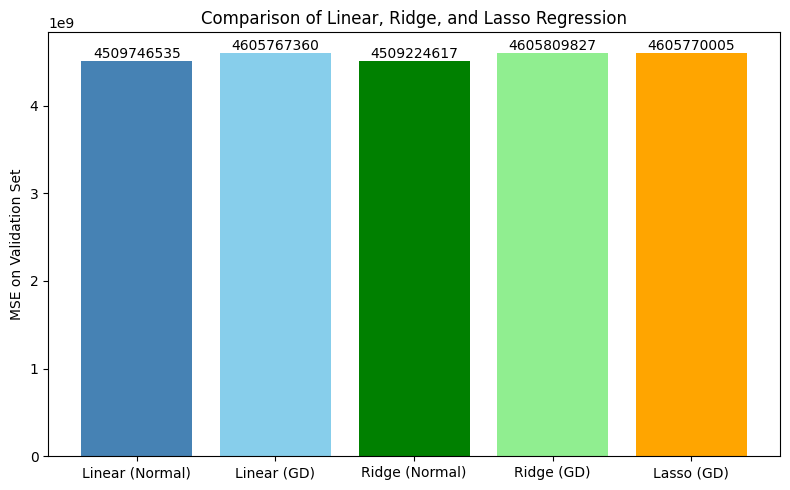

In [71]:
# Collect results MSE
labels = [
    "Linear (Normal)",
    "Linear (GD)",
    "Ridge (Normal)",
    "Ridge (GD)",
    "Lasso (GD)"
]
mse_values = [
    mse_lin_normal,
    mse_lin_gd,
    mse_ridge_normal,
    mse_ridge_gd,
    mse_lasso_gd
]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, mse_values, color=["steelblue", "skyblue", "green", "lightgreen", "orange"])
plt.ylabel("MSE on Validation Set")
plt.title("Comparison of Linear, Ridge, and Lasso Regression")

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### MAE Comparison Bar Chart  
Plots the Mean Absolute Error (MAE) for different models on the validation set.

##### Steps
1. **Computes MAE**: Calculate MAE for Linear, Ridge, and Lasso (both Normal Equation and GD).  
1. **Define Labels & MAE Values**: For all models.
2. **Create Bar Chart**: Each bar represents the validation MAE of a model.  
3. **Annotate Bars**:  Display exact MAE values above each bar.  
4. **Format Plot**: Add labels, title, and adjust colors for clear visualization.


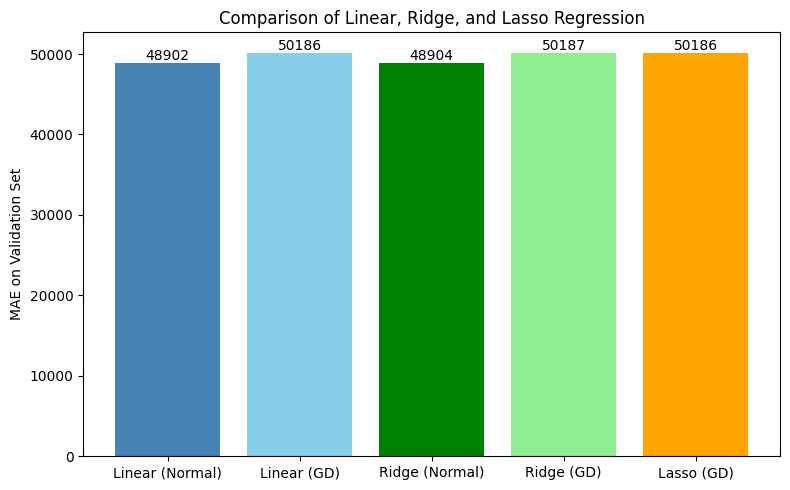

In [72]:
# Collect results MAE

mae_lin_normal = lin_normal.mae(X_val_np, y_val_np)
mae_lin_gd = lin_gd.mae(X_val_np, y_val_np)
mae_ridge_normal = ridge_normal.mae(X_val_np, y_val_np)
mae_ridge_gd = ridge_gd.mae(X_val_np, y_val_np)
mae_lasso_gd = lasso_gd.mae(X_val_np, y_val_np)

labels = [
    "Linear (Normal)",
    "Linear (GD)",
    "Ridge (Normal)",
    "Ridge (GD)",
    "Lasso (GD)"
]
mae_values = [
    mae_lin_normal,
    mae_lin_gd,
    mae_ridge_normal,
    mae_ridge_gd,
    mae_lasso_gd
]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, mae_values, color=["steelblue", "skyblue", "green", "lightgreen", "orange"])
plt.ylabel("MAE on Validation Set")
plt.title("Comparison of Linear, Ridge, and Lasso Regression")

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Hyperparameter Tuning for `alpha` (Ridge & Lasso)  
This block searches for the optimal regularization strength by evaluating multiple values and selecting the one that minimizes validation MSE.

##### Steps
1. **Generate alpha values**: We generate values for alpha using logspace as alpha spans several orders of magnitude, to reach optimal value.
2. **Train Models**: For each alpha, train Ridge (Normal Equation) and Lasso (GD).  
3. **Evaluate MSE**: Compute validation MSE for each alpha and store the results.  
4. **Select Best Alpha**: Find the alpha that gives the lowest MSE for Ridge and Lasso.  
5. **Print Results**: Output the best alpha values and corresponding MSE scores.


In [73]:
alpha_values = np.logspace(-4, 2, 30)

ridge_mse_list = []
lasso_mse_list = []

for alpha in alpha_values:
  ridge_model = M_RidgeRegression(alpha=alpha, use_gradient_descent=False)
  ridge_model.fit(X_train_np, y_train_np)
  ridge_mse = ridge_model.mse(X_val_np, y_val_np)
  ridge_mse_list.append(ridge_mse)

  lasso_model = M_LassoRegression(alpha=alpha, learning_rate=0.001, n_iterations=10000)
  lasso_model.fit(X_train_np, y_train_np)
  lasso_mse = lasso_model.mse(X_val_np, y_val_np)
  lasso_mse_list.append(lasso_mse)

# Find best alpha (min MSE)
best_alpha_ridge = alpha_values[np.argmin(ridge_mse_list)]
best_alpha_lasso = alpha_values[np.argmin(lasso_mse_list)]

print(f"Best alpha for Ridge (GD): {best_alpha_ridge:.6f}, MSE = {min(ridge_mse_list):.2f}")
print(f"Best alpha for Lasso (GD): {best_alpha_lasso:.6f}, MSE = {min(lasso_mse_list):.2f}")


Best alpha for Ridge (GD): 14.873521, MSE = 4506829732.74
Best alpha for Lasso (GD): 0.000100, MSE = 4605801851.74


#### Plotting `MSE` with `alpha` (Ridge & Lasso)  
This block plots how MSE changes as you change alpha to reach the optimal alpha where MSE reaches its minimum.

##### Steps
1. **Plot MSE Curves**: Use `plt.semilogx` to plot MSE vs alpha on a logarithmic x-axis for better visibility across orders of magnitude.  
2. Marks Optimal alpha by drawing vertical lines at the alpha values that minimize validation MSE for Ridge and Lasso.  
3. **Add Labels & Grid**: Include axis labels, title, legend, and grid.
4. **Show Plot**

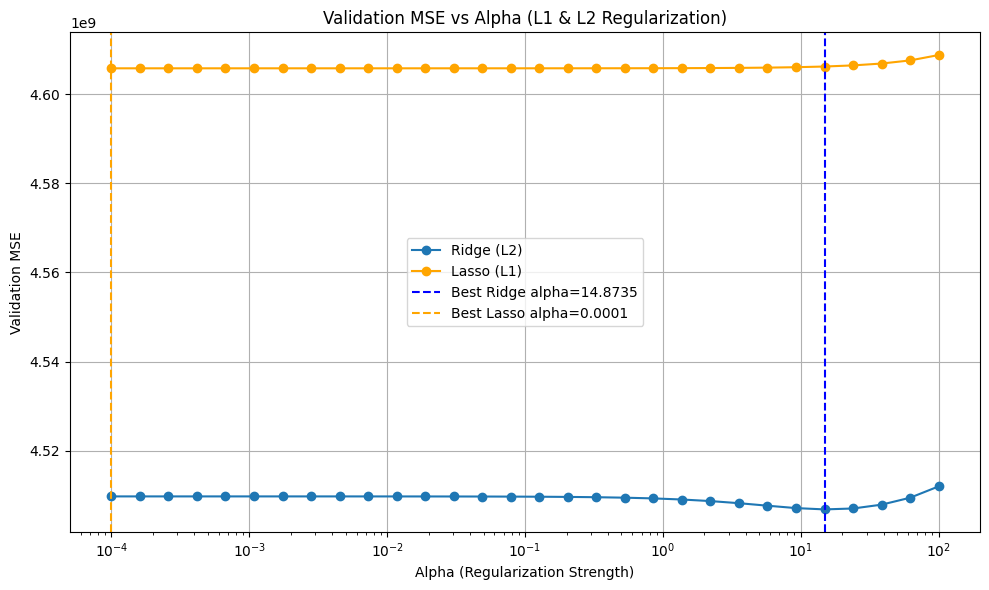

In [74]:
# Plot Validation MSE vs Alpha
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, ridge_mse_list, marker='o', label='Ridge (L2)')
plt.semilogx(alpha_values, lasso_mse_list, marker='o', label='Lasso (L1)', color='orange')

plt.axvline(best_alpha_ridge, linestyle='--', color='blue', label=f'Best Ridge alpha={best_alpha_ridge:.4f}')
plt.axvline(best_alpha_lasso, linestyle='--', color='orange', label=f'Best Lasso alpha={best_alpha_lasso:.4f}')

plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Validation MSE')
plt.title('Validation MSE vs Alpha (L1 & L2 Regularization)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### R2 Score Comparison Bar Chart
Compares between the different models using R2 score which shows the percentage of the variance that can be explained by the model.

##### Steps
1. Computes R2 for Linear (Normal & GD), Ridge (Normal & GD), and Lasso (GD) using the validation set.  
2. Stores model labels and corresponding R2 values.  
3. Display a bar chart with R2 scores for each model.  
4. Add numeric R2 values above each bar for clarity.  
5. Format Plot

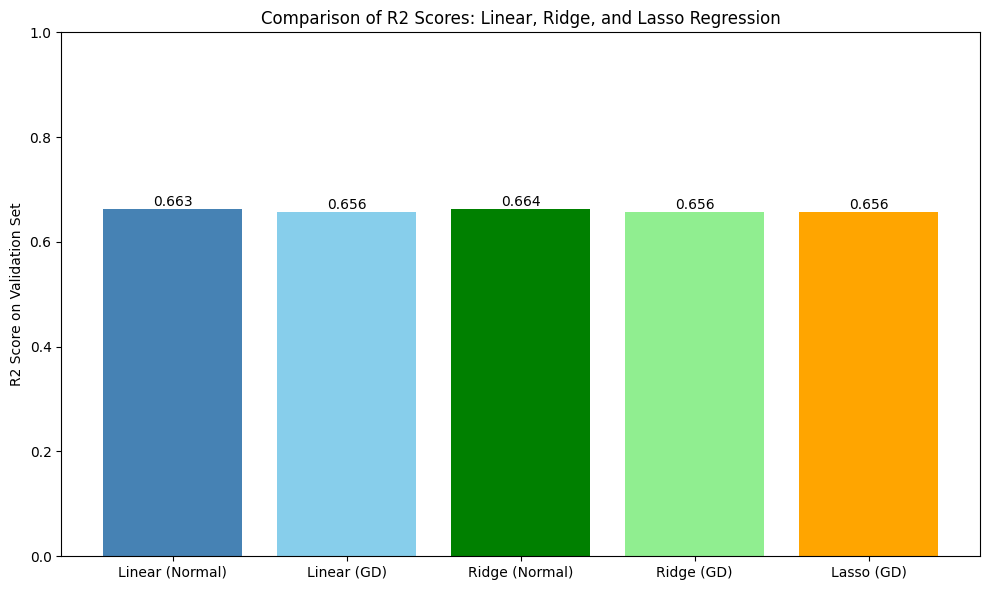

In [75]:
r2_lin_normal = lin_normal.r2_score(X_val_np, y_val_np)
r2_lin_gd = lin_gd.r2_score(X_val_np, y_val_np)

ridge_normal = M_RidgeRegression(alpha=best_alpha_ridge, use_gradient_descent=False)
ridge_normal.fit(X_train_np, y_train_np)
r2_ridge_normal = ridge_normal.r2_score(X_val_np, y_val_np)
r2_ridge_gd = ridge_gd.r2_score(X_val_np, y_val_np)

lasso_gd = M_LassoRegression(alpha=best_alpha_lasso, learning_rate=0.001, n_iterations=10000)
lasso_gd.fit(X_train_np, y_train_np)
r2_lasso_gd = lasso_gd.r2_score(X_val_np, y_val_np)

labels = [
    "Linear (Normal)",
    "Linear (GD)",
    "Ridge (Normal)",
    "Ridge (GD)",
    "Lasso (GD)"
]
r2_values = [
    r2_lin_normal,
    r2_lin_gd,
    r2_ridge_normal,
    r2_ridge_gd,
    r2_lasso_gd
]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, r2_values, color=["steelblue", "skyblue", "green", "lightgreen", "orange"])
plt.ylabel("R2 Score on Validation Set")
plt.title("Comparison of R2 Scores: Linear, Ridge, and Lasso Regression")
plt.ylim(0, 1)

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Test Set R2 Score Comparison: Manual vs Sklearn Implementations
This block compares the R2 scores of manually implemented regression models and their sklearn equivalents on the **test set** to evaluate generalization performance.

##### Steps
1. Calculate R2 for Linear (Normal & GD), Ridge (Normal & GD), Lasso (GD) manually and using sklearn.  
2. **Prepare Data**: Create lists of model names and corresponding R2 values.  
3. **Plot Bar Chart**: Visualize the R2 scores for all models side by side.  
4. **Format Plot**.


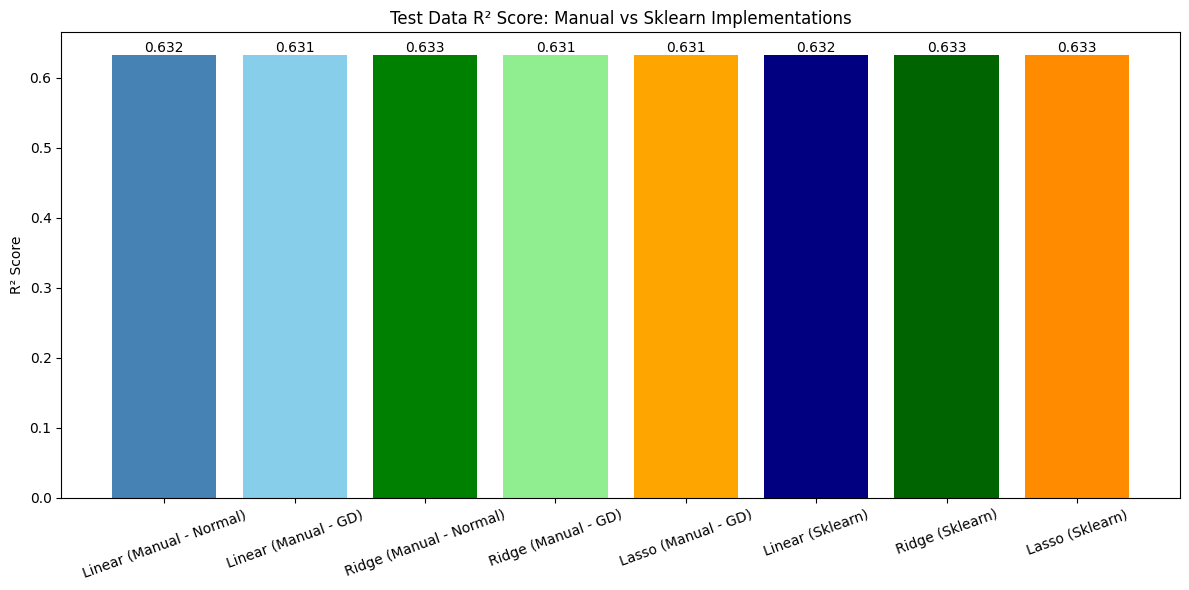

In [77]:
# Final Test Data Comparison
# Manual Implementation
r2_lin_normal = lin_normal.r2_score(X_test_np, y_test_np)
r2_lin_gd = lin_gd.r2_score(X_test_np, y_test_np)

r2_ridge_normal = ridge_normal.r2_score(X_test_np, y_test_np)
r2_ridge_gd = ridge_gd.r2_score(X_test_np, y_test_np)

r2_lasso_gd = lasso_gd.r2_score(X_test_np, y_test_np)

# Sklearn Implementation
sk_lin_normal = LinearRegression()
sk_lin_normal.fit(X_train_scaled, y_train)
sk_y_pred_lin_normal = sk_lin_normal.predict(X_test_scaled)
sk_r2_lin_normal = r2_score(y_test, sk_y_pred_lin_normal)

sk_ridge_normal = Ridge(alpha=sk_best_alpha_ridge)
sk_ridge_normal.fit(X_train_scaled, y_train)
sk_y_pred_ridge_normal = sk_ridge_normal.predict(X_test_scaled)
sk_r2_ridge_normal = r2_score(y_test, sk_y_pred_ridge_normal)

sk_lasso_reg = Lasso(alpha=sk_best_alpha_lasso, max_iter=10000)
sk_lasso_reg.fit(X_train_scaled, y_train)
sk_y_pred_lasso = sk_lasso_reg.predict(X_test_scaled)
sk_r2_lasso_normal = r2_score(y_test, sk_y_pred_lasso)

models = [
    "Linear (Manual - Normal)",
    "Linear (Manual - GD)",
    "Ridge (Manual - Normal)",
    "Ridge (Manual - GD)",
    "Lasso (Manual - GD)",
    "Linear (Sklearn)",
    "Ridge (Sklearn)",
    "Lasso (Sklearn)"
]

r2_values = [
    r2_lin_normal,
    r2_lin_gd,
    r2_ridge_normal,
    r2_ridge_gd,
    r2_lasso_gd,
    sk_r2_lin_normal,
    sk_r2_ridge_normal,
    sk_r2_lasso_normal
]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, r2_values, color=[
    "steelblue", "skyblue", "green", "lightgreen", "orange",
    "navy", "darkgreen", "darkorange"
])

plt.ylabel("R² Score")
plt.title("Test Data R² Score: Manual vs Sklearn Implementations")

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.3f}", ha='center', va='bottom')

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### Observation
1. **Similarity Between Manual and Sklearn**: It can be seen that the result for all the manual implementations and their sklearn counterparts are very similar if not the same *(Except for Lasso whose implementation is different manually than sklearn)*

2. **Results**: Linear regression results are very similar to their regularization counterparts meaning that the weights naturally don't tend to go high up, making the regularization have a low effect.

3. **Difference Between GD and Normal Implementations**: It can be seen that GD impelmentations have more error than closed form solutions. This is due to the computational limit reached from increasing maximum number of iterations and decreasing learning step. As the gradient decreases and we get closer to the closed solution, the steps taken decreases.